In [4]:
print ("Halo, selamat datang. Proyek analisis Deforestasi dan Biomassa dimulai")

Halo, selamat datang. Proyek analisis Deforestasi dan Biomassa dimulai


In [18]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
years = np.arange(2010, 2025)
deforestation = np.random.randint(6000, 12000, size=15) + years*100
biomass = np.random.uniform(600, 100, size=15).round(2)
export_fine = np.random.randint(10, 25, size=15) + (years-2010)*2
timber_export = np.random.randint(2000, 5000, size=15) + (years-2010)*50

data = pd.DataFrame({
    'Tahun': years,
    'Deforestasi_ha': deforestation,
    'Biomassa_ton_ha': biomass,
    'Denda_Ekspor_USD_juta': export_fine,
    'Ekspor_Kayu_ton': timber_export
})

print(data)


    Tahun  Deforestasi_ha  Biomassa_ton_ha  Denda_Ekspor_USD_juta  \
0    2010          207860           589.71                     24   
1    2011          212490           115.05                     25   
2    2012          212426           183.78                     16   
3    2013          212491           493.83                     27   
4    2014          211172           509.09                     24   
5    2015          210592           508.30                     23   
6    2016          213334           447.88                     30   
7    2017          208166           337.62                     26   
8    2018          213134           384.03                     30   
9    2019          212326           454.39                     30   
10   2020          213578           294.07                     36   
11   2021          211544           530.25                     36   
12   2022          211371           453.93                     42   
13   2023          211219         

In [15]:
# Hitung korelasi antara deforestasi dan biomassa
corr_biomass_defor = data['Deforestasi_ha'].corr(data['Biomassa_ton_ha'])
print(f"Korelasi Deforestasi-Biomassa: {corr_biomass_defor:.2f}")

Korelasi Deforestasi-Biomassa: -0.31


In [9]:
corr_fine_defor = data['Denda_Ekspor_USD_juta'].corr(data['Deforestasi_ha'])
print(f"Korelasi Denda Ekspor-Deforestasi: {corr_fine_defor:.2f}")

Korelasi Denda Ekspor-Deforestasi: 0.02


In [13]:
correlation_matrix = data.corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)


Matriks Korelasi:
                          Tahun  Deforestasi_ha  Biomassa_ton_ha  \
Tahun                  1.000000       -0.013088         0.118505   
Deforestasi_ha        -0.013088        1.000000        -0.305560   
Biomassa_ton_ha        0.118505       -0.305560         1.000000   
Denda_Ekspor_USD_juta  0.889315        0.018816         0.188572   
Ekspor_Kayu_ton        0.213125        0.083847         0.099340   

                       Denda_Ekspor_USD_juta  Ekspor_Kayu_ton  
Tahun                               0.889315         0.213125  
Deforestasi_ha                      0.018816         0.083847  
Biomassa_ton_ha                     0.188572         0.099340  
Denda_Ekspor_USD_juta               1.000000         0.160311  
Ekspor_Kayu_ton                     0.160311         1.000000  


In [20]:
from sklearn.linear_model import LinearRegression

# Regresi Denda Ekspor vs Deforestasi
X = data[['Denda_Ekspor_USD_juta']]
y = data['Deforestasi_ha']
model = LinearRegression().fit(X, y)

print(f"Koefisien Regresi: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

# Prediksi
predicted = model.predict(X)

Koefisien Regresi: 4.57
Intercept: 211211.68
R-squared: 0.00


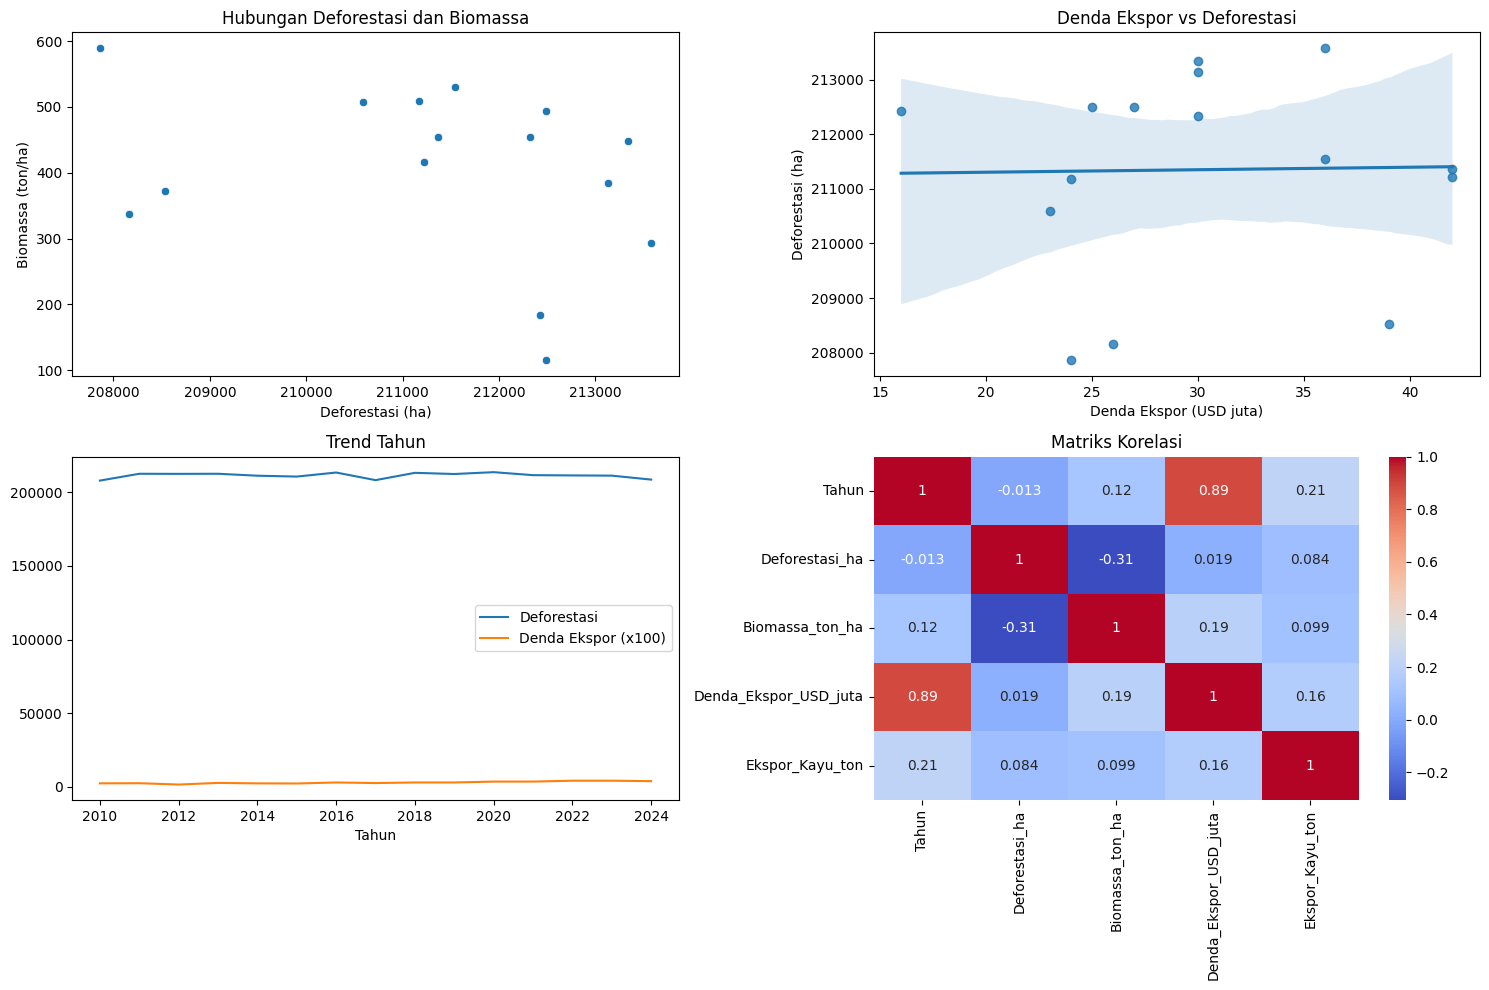

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot 1: Deforestasi vs Biomassa
plt.subplot(2, 2, 1)
sns.scatterplot(x='Deforestasi_ha', y='Biomassa_ton_ha', data=data)
plt.title('Hubungan Deforestasi dan Biomassa')
plt.xlabel('Deforestasi (ha)')
plt.ylabel('Biomassa (ton/ha)')

# Plot 2: Denda Ekspor vs Deforestasi
plt.subplot(2, 2, 2)
sns.regplot(x='Denda_Ekspor_USD_juta', y='Deforestasi_ha', data=data)
plt.title('Denda Ekspor vs Deforestasi')
plt.xlabel('Denda Ekspor (USD juta)')
plt.ylabel('Deforestasi (ha)')

# Plot 3: Trend Tahun
plt.subplot(2, 2, 3)
plt.plot(data['Tahun'], data['Deforestasi_ha'], label='Deforestasi')
plt.plot(data['Tahun'], data['Denda_Ekspor_USD_juta']*100, label='Denda Ekspor (x100)')
plt.title('Trend Tahun')
plt.xlabel('Tahun')
plt.legend()

# Plot 4: Heatmap Korelasi
plt.subplot(2, 2, 4)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')

plt.tight_layout()
plt.show()